# Assignment 2: Neural Networks
---
Samarth Kumar

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Load the data

In [47]:
# Load dataset using pandas
X_train = pd.read_csv("X_train.csv", header=None, delimiter=r"\s+").astype(float).values
Y_train = pd.read_csv("Y_train.csv", header=None, delimiter=r"\s+").astype(float).values
X_test = pd.read_csv("X_test.csv", header=None, delimiter=r"\s+").astype(float).values
Y_test = pd.read_csv("Y_test.csv", header=None, delimiter=r"\s+").astype(float).values

### Define the Activation functions
Sigmoid, ReLu, and Tanh

In [48]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

In [49]:
activation_functions = {
    "sigmoid": (sigmoid, sigmoid_derivative),
    "relu": (relu, relu_derivative),
    "tanh": (tanh, tanh_derivative)
}

### Define the Forward Pass and Backpropagation

In [50]:
# Forward pass
def forward_pass(X, W1, b1, W2, b2, activation_func):
    Z1 = np.dot(X, W1) + b1
    A1 = activation_func(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

# Backward propagation
def backpropagation(X, Y, Z1, A1, Z2, W2, activation_deriv):
    dL_dY_pred = 2 * (Z2 - Y) / Y.shape[0]
    dL_dW2 = np.dot(A1.T, dL_dY_pred)
    dL_db2 = np.sum(dL_dY_pred, axis=0, keepdims=True)
    dL_dA1 = np.dot(dL_dY_pred, W2.T)
    dL_dZ1 = dL_dA1 * activation_deriv(A1)
    dL_dW1 = np.dot(X.T, dL_dZ1)
    dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True)

    # Clip gradients to avoid exploding gradients
    dL_dW1 = np.clip(dL_dW1, -5, 5)
    dL_db1 = np.clip(dL_db1, -5, 5)
    dL_dW2 = np.clip(dL_dW2, -5, 5)
    dL_db2 = np.clip(dL_db2, -5, 5)

    return dL_dW1, dL_db1, dL_dW2, dL_db2

Helper Functions

In [51]:
# Initialize values
def initialize(hidden_size):
    input_size = X_train.shape[1]
    output_size = 1
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [52]:
# Plotting Loss
def plot_loss(losses_dict, learning_rate, hidden_size):
    plt.figure(figsize=(8, 6))
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(f"Loss Curves for Different Activations (LR={learning_rate}, Neurons={hidden_size})")
    
    for activation_name, (losses_train, losses_val) in losses_dict.items():
        plt.plot(losses_train, label=f'{activation_name} Train Loss')
        plt.plot(losses_val, label=f'{activation_name} Val Loss', linestyle='dashed')
    
    plt.legend()
    plt.show()

### Training the Neural Network

In [53]:
# Training function
def train_network(X_train, Y_train, X_val, Y_val, hidden_size, learning_rate, num_epochs):
    
    losses_dict = {}
    
    for activation_name, (activation_func, activation_deriv) in activation_functions.items():
        print(f"Training with {activation_name} activation function")
        
        W1, b1, W2, b2 = initialize(hidden_size)
        
        losses_train = []
        losses_val = []
        
        for epoch in range(num_epochs):
            Z1, A1, Z2 = forward_pass(
                X_train, W1, b1, W2, b2, activation_func
            )
            loss_train = np.mean((Y_train - Z2) ** 2)
            losses_train.append(loss_train)
            
            _, _, Z2_val = forward_pass(
                X_val, W1, b1, W2, b2, activation_func
            )
            loss_val = np.mean((Y_val - Z2_val) ** 2)
            losses_val.append(loss_val)
            
            dL_dW1, dL_db1, dL_dW2, dL_db2 = backpropagation(
                X_train, Y_train, Z1, A1, Z2, W2, activation_deriv
            )
            
            W1 -= learning_rate * dL_dW1
            b1 -= learning_rate * dL_db1
            W2 -= learning_rate * dL_dW2
            b2 -= learning_rate * dL_db2
            
            if epoch % 100 == 0 or epoch == num_epochs - 1:
                print(f"    Epoch {epoch}, Train Loss: {loss_train:.4f}, Val Loss: {loss_val:.4f}")
        
        losses_dict[activation_name] = (losses_train, losses_val)
    
    plot_loss(losses_dict, learning_rate, hidden_size)

### Testing our neural network

#### Constant Hidden Size, Learning Rates 0.001, 0.01, 0.1, 1.0

hidden_size = 10, learning_rate = 0.001

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.7706, Val Loss: 5640.5790
    Epoch 100, Train Loss: 5592.2422, Val Loss: 5494.2361
    Epoch 200, Train Loss: 5337.3085, Val Loss: 5227.9538
    Epoch 300, Train Loss: 5030.4664, Val Loss: 4931.6958
    Epoch 400, Train Loss: 4719.1175, Val Loss: 4640.3531
    Epoch 500, Train Loss: 4422.9644, Val Loss: 4364.7276
    Epoch 600, Train Loss: 4149.0922, Val Loss: 4110.2961
    Epoch 700, Train Loss: 3898.7968, Val Loss: 3878.9562
    Epoch 800, Train Loss: 3671.5009, Val Loss: 3670.5689
    Epoch 900, Train Loss: 3469.0584, Val Loss: 3486.8803
    Epoch 999, Train Loss: 3289.0336, Val Loss: 3324.8773
Training with relu activation function
    Epoch 0, Train Loss: 5716.8333, Val Loss: 5640.6632
    Epoch 100, Train Loss: 5558.0583, Val Loss: 5483.4789
    Epoch 200, Train Loss: 4879.1889, Val Loss: 4825.6956
    Epoch 300, Train Loss: 3767.0845, Val Loss: 3746.9544
    Epoch 400, Train Loss: 2452.5745, Val Loss: 2452.

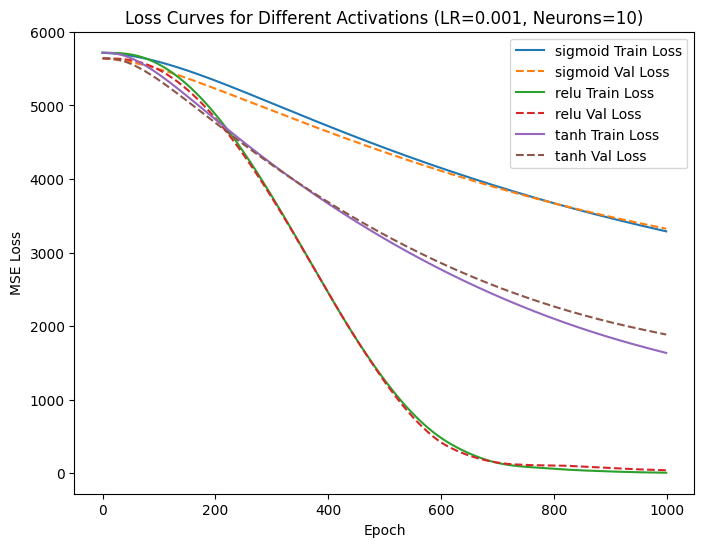

In [54]:
# from sklearn.model_selection import train_test_split
# Split dataset into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

hidden_size = 10 # Adjust as needed
learning_rate = 0.001  # Adjust as needed
num_epochs = 1000  # Adjust as needed

train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

hidden_size = 10, learning_rate = 0.01

Training with sigmoid activation function
    Epoch 0, Train Loss: 5717.1103, Val Loss: 5641.0862
    Epoch 100, Train Loss: 3289.8435, Val Loss: 3325.5955
    Epoch 200, Train Loss: 2162.4095, Val Loss: 2370.0226
    Epoch 300, Train Loss: 1714.8987, Val Loss: 2005.5809
    Epoch 400, Train Loss: 1455.7179, Val Loss: 1758.8626
    Epoch 500, Train Loss: 1254.3207, Val Loss: 1572.6601
    Epoch 600, Train Loss: 1076.0544, Val Loss: 1407.5572
    Epoch 700, Train Loss: 917.6478, Val Loss: 1259.5601
    Epoch 800, Train Loss: 777.9672, Val Loss: 1126.6651
    Epoch 900, Train Loss: 655.5317, Val Loss: 1006.1537
    Epoch 999, Train Loss: 550.0912, Val Loss: 896.9252
Training with relu activation function
    Epoch 0, Train Loss: 5716.8221, Val Loss: 5640.6473
    Epoch 100, Train Loss: 29.9541, Val Loss: 73.1608
    Epoch 200, Train Loss: 26.4050, Val Loss: 66.6992
    Epoch 300, Train Loss: 25.6594, Val Loss: 64.8063
    Epoch 400, Train Loss: 25.5196, Val Loss: 64.5580
    Epoch 500, T

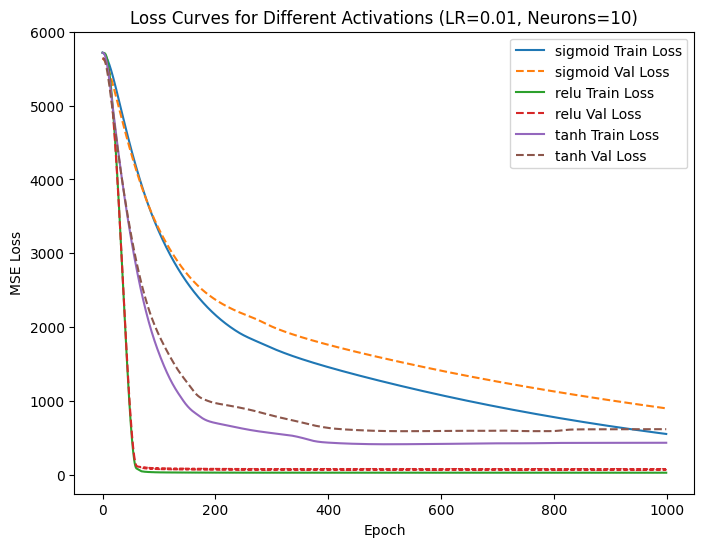

In [55]:
hidden_size = 10 
learning_rate = 0.01  
num_epochs = 1000  
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

learning_rate = 0.1

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.9962, Val Loss: 5640.9189
    Epoch 100, Train Loss: 890.1562, Val Loss: 1307.7616
    Epoch 200, Train Loss: 652.1534, Val Loss: 1048.6670
    Epoch 300, Train Loss: 607.5306, Val Loss: 996.2358
    Epoch 400, Train Loss: 600.4799, Val Loss: 987.6362
    Epoch 500, Train Loss: 599.7758, Val Loss: 986.7431
    Epoch 600, Train Loss: 599.7705, Val Loss: 986.7249
    Epoch 700, Train Loss: 599.7729, Val Loss: 986.7247
    Epoch 800, Train Loss: 599.7735, Val Loss: 986.7246
    Epoch 900, Train Loss: 599.7736, Val Loss: 986.7246
    Epoch 999, Train Loss: 613.0182, Val Loss: 956.4047
Training with relu activation function
    Epoch 0, Train Loss: 5716.7688, Val Loss: 5640.5969
    Epoch 100, Train Loss: 637.1641, Val Loss: 572.1322
    Epoch 200, Train Loss: 637.1641, Val Loss: 572.1322
    Epoch 300, Train Loss: 637.1641, Val Loss: 572.1322
    Epoch 400, Train Loss: 637.1641, Val Loss: 572.1322
    Epoch 500, Train 

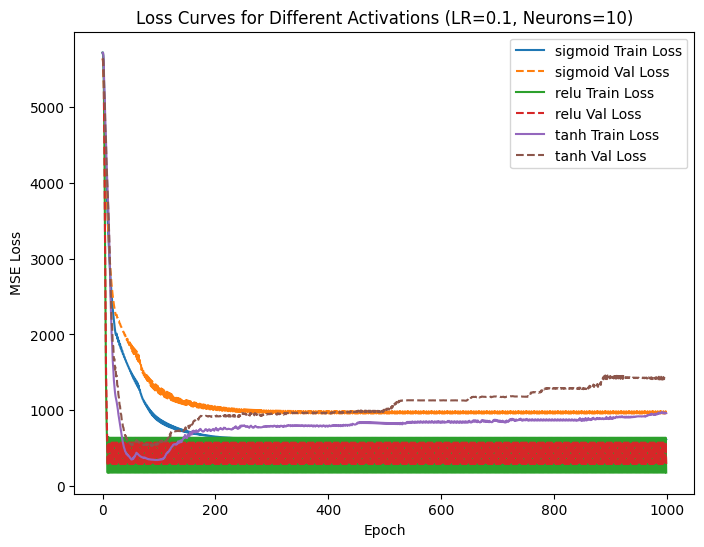

In [56]:
hidden_size = 10 
learning_rate = 0.1  
num_epochs = 1000  
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

learning_rate = 1.0

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.4035, Val Loss: 5640.0384
    Epoch 100, Train Loss: 2082.3788, Val Loss: 2461.9023
    Epoch 200, Train Loss: 2077.5911, Val Loss: 2435.9873
    Epoch 300, Train Loss: 2075.6644, Val Loss: 2422.8830
    Epoch 400, Train Loss: 2074.4548, Val Loss: 2413.3109
    Epoch 500, Train Loss: 2073.3945, Val Loss: 2404.3175
    Epoch 600, Train Loss: 1715.7394, Val Loss: 2167.3084
    Epoch 700, Train Loss: 1547.4236, Val Loss: 2021.8739
    Epoch 800, Train Loss: 1540.9342, Val Loss: 1997.6033
    Epoch 900, Train Loss: 1539.6448, Val Loss: 1988.2639
    Epoch 999, Train Loss: 1932.3149, Val Loss: 2158.4548
Training with relu activation function
    Epoch 0, Train Loss: 5716.8148, Val Loss: 5640.6434
    Epoch 100, Train Loss: 87241.6078, Val Loss: 87985.8681
    Epoch 200, Train Loss: 87241.6078, Val Loss: 87985.8681
    Epoch 300, Train Loss: 87241.6078, Val Loss: 87985.8681
    Epoch 400, Train Loss: 87241.6078, Val Loss

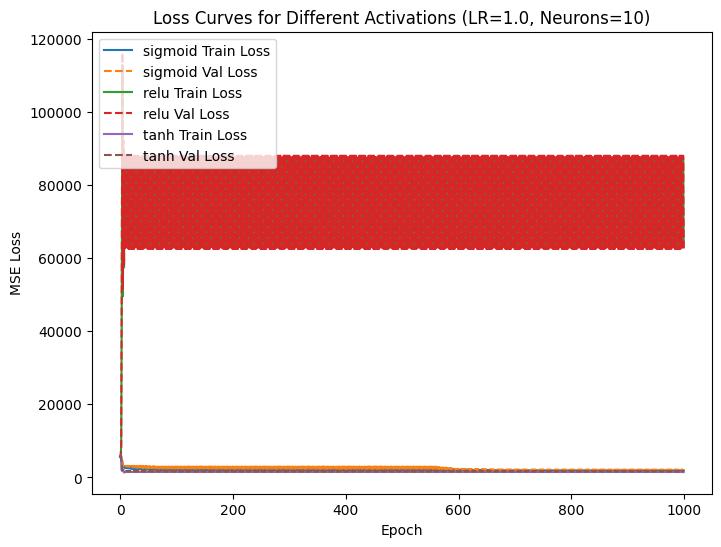

In [57]:
hidden_size = 10 
learning_rate = 1.0  
num_epochs = 1000  
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

#### Constant learning rate, hidden sizes 1, 5, 10, 20

hidden_size = 1

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.7180, Val Loss: 5640.5013
    Epoch 100, Train Loss: 5696.1673, Val Loss: 5614.2968
    Epoch 200, Train Loss: 5661.6016, Val Loss: 5574.7868
    Epoch 300, Train Loss: 5620.8457, Val Loss: 5530.6589
    Epoch 400, Train Loss: 5578.6905, Val Loss: 5485.7696
    Epoch 500, Train Loss: 5537.2572, Val Loss: 5441.5541
    Epoch 600, Train Loss: 5497.2656, Val Loss: 5398.6189
    Epoch 700, Train Loss: 5458.9251, Val Loss: 5357.2056
    Epoch 800, Train Loss: 5422.4024, Val Loss: 5317.7784
    Epoch 900, Train Loss: 5387.7578, Val Loss: 5281.0604
    Epoch 999, Train Loss: 5354.7900, Val Loss: 5246.7516
Training with relu activation function
    Epoch 0, Train Loss: 5716.8062, Val Loss: 5640.6310
    Epoch 100, Train Loss: 5679.1832, Val Loss: 5600.2686
    Epoch 200, Train Loss: 5563.7699, Val Loss: 5483.9930
    Epoch 300, Train Loss: 5376.4228, Val Loss: 5298.8003
    Epoch 400, Train Loss: 5127.4264, Val Loss: 5055.

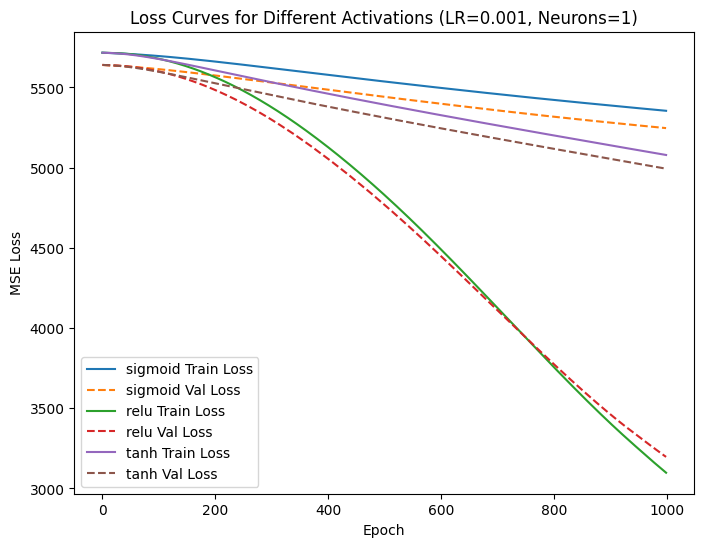

In [58]:
hidden_size = 1 
learning_rate = 0.001  
num_epochs = 1000  
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

hidden_size = 5

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.8034, Val Loss: 5640.6280
    Epoch 100, Train Loss: 5649.4504, Val Loss: 5560.2567
    Epoch 200, Train Loss: 5512.4255, Val Loss: 5414.4249
    Epoch 300, Train Loss: 5345.2473, Val Loss: 5247.3671
    Epoch 400, Train Loss: 5173.6824, Val Loss: 5080.5252
    Epoch 500, Train Loss: 5007.7116, Val Loss: 4921.0400
    Epoch 600, Train Loss: 4848.9440, Val Loss: 4769.4754
    Epoch 700, Train Loss: 4696.9840, Val Loss: 4625.2612
    Epoch 800, Train Loss: 4551.1117, Val Loss: 4487.5495
    Epoch 900, Train Loss: 4411.2643, Val Loss: 4355.8373
    Epoch 999, Train Loss: 4279.4245, Val Loss: 4232.2352
Training with relu activation function
    Epoch 0, Train Loss: 5716.8123, Val Loss: 5640.6367
    Epoch 100, Train Loss: 5640.8195, Val Loss: 5563.4892
    Epoch 200, Train Loss: 5357.5480, Val Loss: 5289.4677
    Epoch 300, Train Loss: 4909.5550, Val Loss: 4858.0076
    Epoch 400, Train Loss: 4390.6735, Val Loss: 4348.

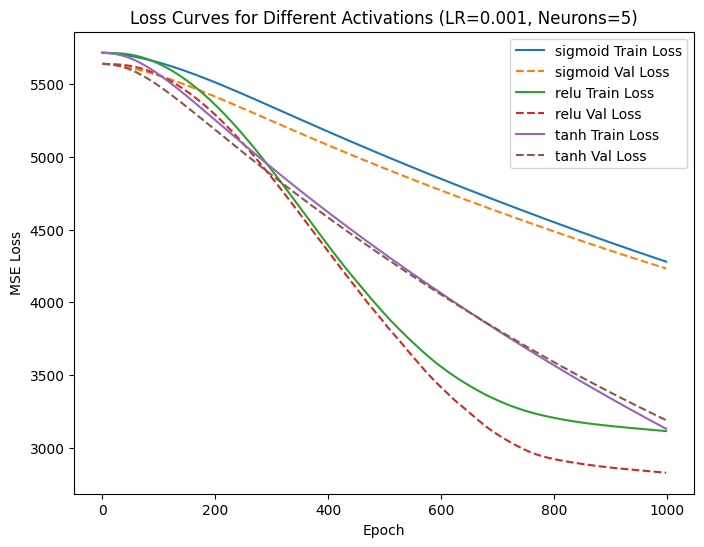

In [59]:
hidden_size = 5 
learning_rate = 0.001  
num_epochs = 1000  
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

hidden_size = 10

Training with sigmoid activation function
    Epoch 0, Train Loss: 5717.3177, Val Loss: 5641.3845
    Epoch 100, Train Loss: 5593.3354, Val Loss: 5495.3202
    Epoch 200, Train Loss: 5339.0412, Val Loss: 5229.6949
    Epoch 300, Train Loss: 5032.7062, Val Loss: 4933.9013
    Epoch 400, Train Loss: 4721.6813, Val Loss: 4642.7927
    Epoch 500, Train Loss: 4425.6708, Val Loss: 4367.2586
    Epoch 600, Train Loss: 4151.8222, Val Loss: 4112.8159
    Epoch 700, Train Loss: 3901.4753, Val Loss: 3881.4027
    Epoch 800, Train Loss: 3674.0897, Val Loss: 3672.9137
    Epoch 900, Train Loss: 3471.5324, Val Loss: 3489.1065
    Epoch 999, Train Loss: 3291.3611, Val Loss: 3326.9613
Training with relu activation function
    Epoch 0, Train Loss: 5716.7904, Val Loss: 5640.6152
    Epoch 100, Train Loss: 5493.2697, Val Loss: 5421.2791
    Epoch 200, Train Loss: 4714.8290, Val Loss: 4666.7763
    Epoch 300, Train Loss: 3503.5173, Val Loss: 3493.7644
    Epoch 400, Train Loss: 2096.3133, Val Loss: 2120.

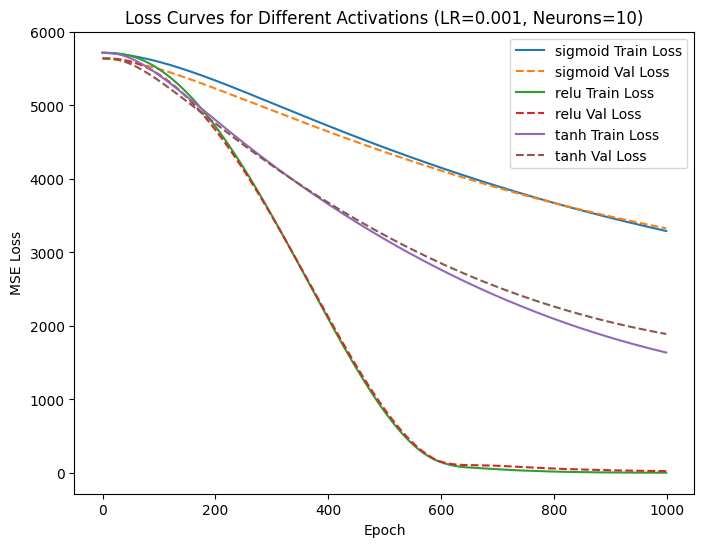

In [60]:
hidden_size = 10 
learning_rate = 0.001  
num_epochs = 1000  
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)